**Importing Libraries**

In [ ]:
 import numpy as np # linear data
 import pandas as pd # Data frame organisation
 import matplotlib.pyplot as plt # graph plot
 import seaborn as sns # complex graph plot

**Mouting Google Drive**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Data**

In [ ]:
loan_data = pd.read_csv('/content/drive/MyDrive/Project DS/loan_data.csv') # read_csv funtion to read 
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


**Exploratory Data Analysis**

Create a histogram of two FICO distributions on top of each other, one for each credit.policy
outcome.


Text(0.5, 0, 'FICO SCORE')

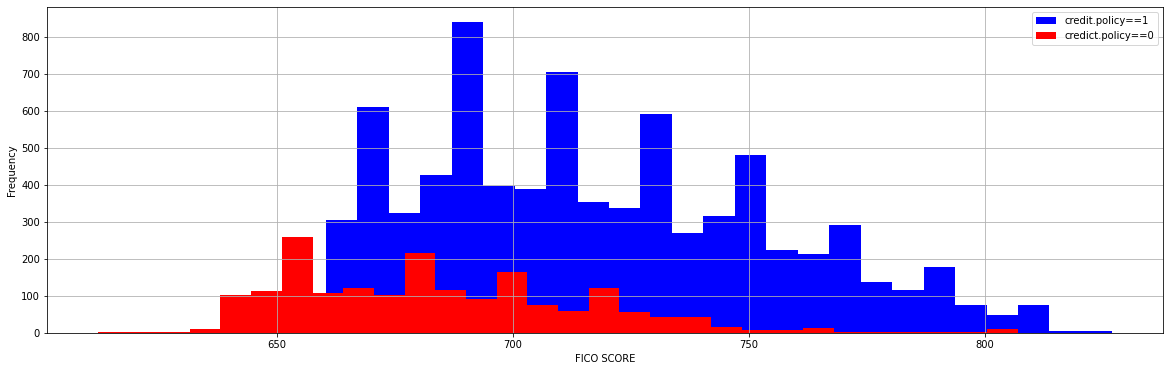

In [ ]:
plt.figure(figsize=(20, 6))
# loan_data[loan_data['credit.policy'] == 1]['fico'].hist(bins=30, color="blue", label="credit.policy==1")
loan_data[loan_data['credit.policy'] == 1]['fico'].plot(kind='hist', bins=30, color='blue', label="credit.policy==1")
loan_data[loan_data['credit.policy'] == 0]['fico'].hist(bins=30, color="red", label="credict.policy==0")
plt.legend() # TO SHOW LABLEL
plt.xlabel('FICO SCORE')


Create a histogram of two FICO distributions on top of each other, one for each not.fully.paid.

Text(0.5, 0, 'FICO SCORE')

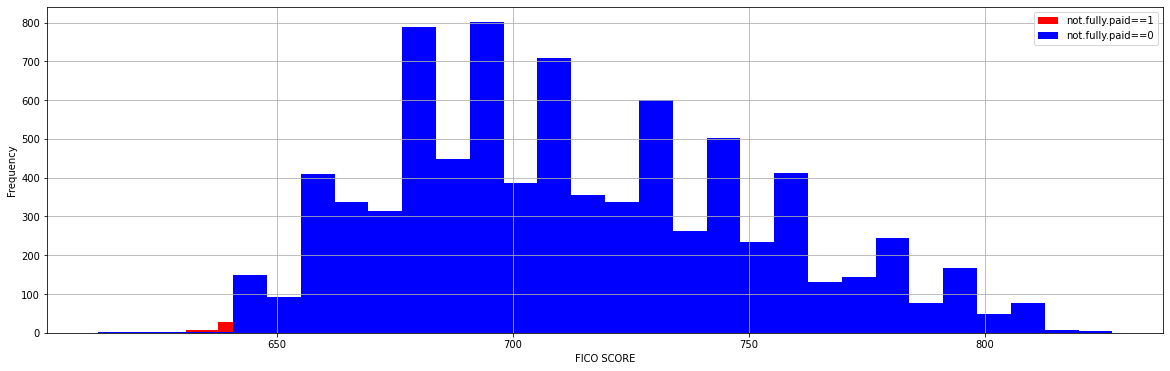

In [ ]:
plt.figure(figsize=(20, 6))
# loan_data[loan_data['credit.policy'] == 1]['fico'].hist(bins=30, color="blue", label="credit.policy==1")
loan_data[loan_data['not.fully.paid'] == 1]['fico'].plot(kind='hist', bins=30, color='red', label="not.fully.paid==1")
loan_data[loan_data['not.fully.paid'] == 0]['fico'].hist(bins=30, color="blue", label="not.fully.paid==0")
plt.legend() # TO SHOW LABLEL
plt.xlabel('FICO SCORE')

Count plot between purpose and not.fully.paid

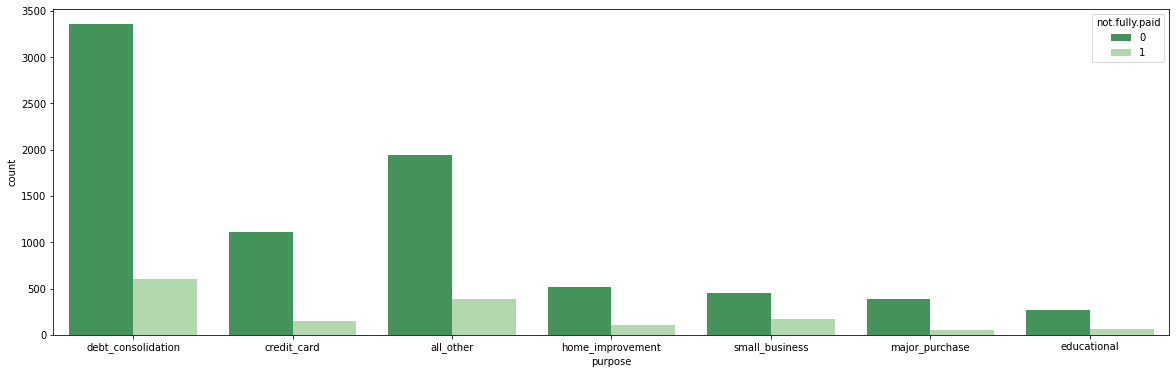

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(x='purpose', hue='not.fully.paid', data=loan_data, palette="Greens_r")

Join plot between FICO score and Interest rate

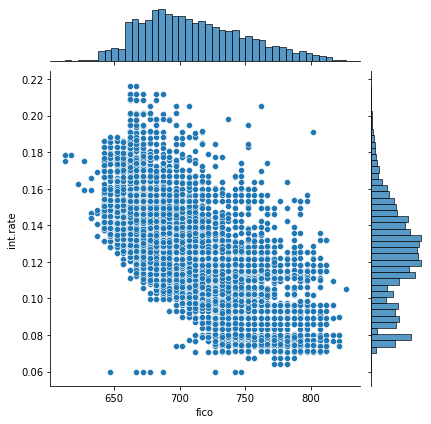

In [ ]:
sns.jointplot(x='fico', y='int.rate', data=loan_data)

**Encoding The String Data Column Into Integer Column**

In [ ]:
from sklearn.preprocessing import LabelEncoder 
loan_data_copy = loan_data;
loan_data_copy['purpose_encoded'] = LabelEncoder().fit_transform(loan_data['purpose']);
loan_data_copy.drop(columns=['purpose'], inplace=True)
loan_data_copy.head(10)


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encoded
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,2
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,2
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,2
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1
5,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,1
6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,2
7,1,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,0
8,1,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0,4
9,1,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0,2


**Splitting The Dataset Into The Training Set And Test Set**

In [ ]:
from sklearn.model_selection import train_test_split
X = loan_data_copy.iloc[:, loan_data_copy.columns!='not.fully.paid'].values
y = loan_data_copy.iloc[:,-2].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
print(X_train[:5])
print()

print(X_test[:5])
print()

print(y_train[:5])
print()

print(y_test[:5])
print()

[[1.00000000e+00 1.38700000e-01 3.27500000e+02 1.16082356e+01
  1.86200000e+01 6.62000000e+02 6.29995833e+03 6.80300000e+04
  8.27000000e+01 3.00000000e+00 0.00000000e+00 0.00000000e+00
  2.00000000e+00]
 [0.00000000e+00 1.45000000e-01 3.85520000e+02 1.12384886e+01
  2.00200000e+01 6.67000000e+02 3.78004167e+03 7.32700000e+03
  5.09000000e+01 6.00000000e+00 0.00000000e+00 1.00000000e+00
  2.00000000e+00]
 [0.00000000e+00 9.01000000e-02 9.54200000e+01 1.04631033e+01
  1.00000000e+01 7.17000000e+02 4.77000000e+03 0.00000000e+00
  1.40000000e+01 3.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.00000000e+00 1.14800000e-01 3.29700000e+01 1.01345993e+01
  1.15700000e+01 7.02000000e+02 5.76000000e+03 7.56900000e+03
  7.42000000e+01 2.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.35500000e-01 1.69800000e+02 1.10348897e+01
  4.88000000e+00 6.52000000e+02 6.30000000e+03 3.34100000e+03
  1.98000000e+01 3.00000000e+00 1.00000000e+00 0.00000000e+0

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler();
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train[:5])
print()
print(X_test[:5])

[[ 0.48962308  0.6017048   0.03501718  1.08707262  0.88913238 -1.29695167
   0.68140939  1.45651306  1.24045031  0.64318912 -0.29780951 -0.23803097
   0.03801296]
 [-2.0423874   0.836106    0.31519239  0.48456504  1.09252137 -1.16484162
  -0.31581241 -0.27728324  0.1442744   2.00282049 -0.29780951  3.48697219
   0.03801296]
 [-2.0423874  -1.20653303 -1.08568369 -0.77893538 -0.36316266  0.15625879
   0.07594976 -0.48655668 -1.12770331  0.64318912 -0.29780951 -0.23803097
  -1.14657303]
 [ 0.48962308 -0.2875315  -1.38725112 -1.31423705 -0.13507644 -0.24007133
   0.46772842 -0.27037125  0.94744731  0.18997866 -0.29780951 -0.23803097
  -1.14657303]
 [-2.0423874   0.48264388 -0.72650698  0.15279788 -1.10698524 -1.56117175
   0.68142588 -0.39113119 -0.92777186  0.64318912  1.49980874 -0.23803097
   0.03801296]]

[[ 0.48962308 -0.13498468 -1.30622147 -0.18151471  0.63489615 -0.63640146
  -0.89559866 -0.45908008  0.59929081 -0.71644226 -0.29780951 -0.23803097
  -1.14657303]
 [ 0.48962308 -0.015

**Training The Logistic Regression Model On The Training Set**

In [ ]:
from sklearn.linear_model import LogisticRegression
L_clf = LogisticRegression(random_state=0)
L_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Prediction of Result using Logistic Regression**

In [ ]:
predict_new_result = L_clf.predict([X_test[0]])
print(y_test[0], predict_new_result[0])

0 0


**Buiding Confussion Matrix of Logistic Regression**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_predict_L = L_clf.predict(X_test)
cm_L = confusion_matrix(y_test, y_predict_L)
print(cm_L)

[[2006    8]
 [ 379    2]]


**Accuracy of Logistic regression**

In [ ]:
accuracy_of_model_L = accuracy_score(y_test, y_predict_L)
print('Accuracy of Model : ', accuracy_of_model_L)

Accuracy of Model :  0.8384133611691023


**Training The Decision Tree Model On The Training Set**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

D_clf = DecisionTreeClassifier(criterion="entropy", random_state=0)
D_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

**Prediction of Result using Decision Tree Model**

In [ ]:
predict_new_result = D_clf.predict([X_test[0]])
print(y_test[0], predict_new_result[0])

0 0


**Buiding Confussion Matrix of Decision Tree**

In [ ]:
y_predict_D = D_clf.predict(X_test)
cm_D = confusion_matrix(y_test, y_predict_D)
print(cm_D)

[[1681  333]
 [ 293   88]]


**Accuracy of Decision Tree Model**

In [ ]:
accuracy_of_model_D = accuracy_score(y_test, y_predict_D)
print('Accuracy of Model : ', accuracy_of_model_D)

Accuracy of Model :  0.7386221294363257


**Training The Random Forest Classification Model On The Training Set**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=100, random_state=0)
RF_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

**Prediction of Result using Random Forest Model**

In [ ]:
predict_new_result = RF_clf.predict([X_test[0]])
print(y_test[0], predict_new_result[0])

0 0


**Building The Confusion Matrix of Random Forest Model**

In [ ]:
y_predict_RF = RF_clf.predict(X_test)
cm_RF = confusion_matrix(y_test, y_predict_RF)
print(cm_RF)

[[1999   15]
 [ 366   15]]


**Accuracy of Random Forest Model**

In [ ]:
accuracy_of_model_RF = accuracy_score(y_test, y_predict_RF)
print('Accuracy of Model : ', accuracy_of_model_RF)

Accuracy of Model :  0.8409185803757829


##**Observation :**

### Logistic Regression: 83.84 (false negative :379) 
### Decision Tree : 73.86 (false negative : 293) 
### Random Forest : 84.00 (false negative : 366)

**Conclusion:** we will go with **Random Forest Model** as we get maximum accuracy with minimum negative in all model which we have implemented.